In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [3]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    discriminant:float
    result:str

In [7]:
def show_equation(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    equation = f"{a}x^2 + {b}x + {c} = 0"
    return {'equation':equation}

In [ ]:
def compute_discriminant(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    return {'discriminant':discriminant}

In [13]:
def real_roots(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    D = state['discriminant']
    root1 = (-b + D**0.5) / (2*a)
    root2 = (-b - D**0.5) / (2*a)
    result = f"Real roots: {root1} and {root2}"
    return {'result':result}

In [18]:
def repeated_roots(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    root = -b / (2*a)
    result = f"Repeated root: {root}"
    return {'result':result}

In [17]:
def complex_roots(state: QuadState) -> QuadState:
    result = "Complex roots"
    return {'result':result}

In [21]:
def check_condition(state: QuadState) -> Literal['real_roots','repeated_roots','complex_roots']:
    D = state['discriminant']
    if D > 0:
        return 'real_roots'
    elif D == 0:
        return 'repeated_roots'
    else:
        return 'complex_roots'

In [22]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('compute_discriminant', compute_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('complex_roots', complex_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'compute_discriminant')
graph.add_conditional_edges('compute_discriminant',check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('complex_roots', END)

workflow = graph.compile()

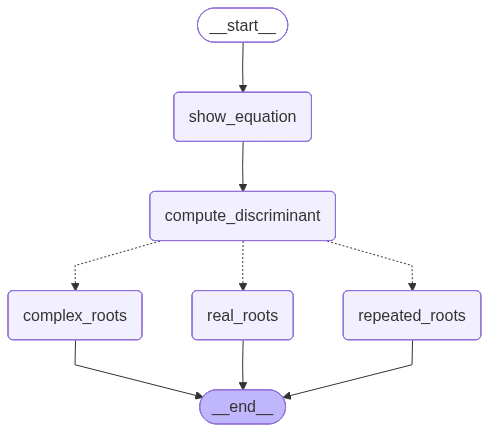

In [23]:
workflow

In [25]:
initial_state = {
    'a': 4,
    'b': 2,
    'c': 4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4x^2 + 2x + 4 = 0',
 'discriminant': -60,
 'result': 'Complex roots'}